In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [3]:
df_train = pd.read_csv("C:/Users/oekpom/Desktop/Datasets/Machine Learning/Lesson 4/train.csv")
df_train.shape

(891, 12)

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train.shape

(891, 12)

In [10]:
df_train = df_train.drop(["PassengerId", "Ticket", "Cabin", "Name"], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [12]:
df_train.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [13]:
df_train["Age"] = df_train[["Age","Pclass"]].apply(age_approx, axis=1)

In [14]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
df_train.dropna(inplace = True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [19]:
df_train_dummies = pd.get_dummies(df_train, columns =["Sex"])

In [20]:
df_train_dummies = pd.get_dummies(df_train_dummies, columns =["Embarked"])

In [21]:
df_train_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


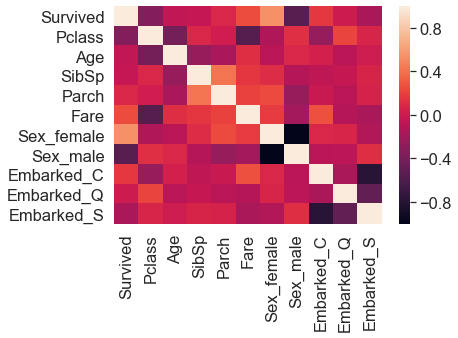

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummies.corr())

In [23]:
used_features = ["Pclass", "Age", "SibSp", "Parch", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S"]
x = df_train_dummies[used_features].values
y = df_train_dummies["Survived"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [27]:
LogReg = LogisticRegression()

In [28]:
LogReg.fit(x_train, y_train)

C:\Users\oekpom\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = LogReg.predict(x_test)

In [30]:
metrics.confusion_matrix(y_test,y_pred)

array([[141,  25],
       [ 22,  79]], dtype=int64)

In [31]:
metrics.accuracy_score(y_test,y_pred)

0.8239700374531835

In [32]:
len(x_test)

267

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       166
           1       0.76      0.78      0.77       101

    accuracy                           0.82       267
   macro avg       0.81      0.82      0.81       267
weighted avg       0.83      0.82      0.82       267



In [34]:
LogReg.coef_

array([[-0.93158887, -0.03365718, -0.22105525, -0.03237922,  2.04053499,
        -0.31206888,  0.95081772,  0.48415991,  0.29348849]])

In [35]:
LogReg.intercept_

array([1.72846611])

In [36]:
df_train_dummies[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [38]:
LogReg.predict_proba(x_test)

array([[0.27137586, 0.72862414],
       [0.38129071, 0.61870929],
       [0.93705176, 0.06294824],
       [0.28498246, 0.71501754],
       [0.93855022, 0.06144978],
       [0.15035186, 0.84964814],
       [0.34031435, 0.65968565],
       [0.51286853, 0.48713147],
       [0.77784609, 0.22215391],
       [0.40308285, 0.59691715],
       [0.7386939 , 0.2613061 ],
       [0.21638753, 0.78361247],
       [0.75571899, 0.24428101],
       [0.16935669, 0.83064331],
       [0.86120552, 0.13879448],
       [0.37115502, 0.62884498],
       [0.87641966, 0.12358034],
       [0.29879879, 0.70120121],
       [0.18517098, 0.81482902],
       [0.43237452, 0.56762548],
       [0.89677656, 0.10322344],
       [0.58698185, 0.41301815],
       [0.85667563, 0.14332437],
       [0.93246242, 0.06753758],
       [0.52812139, 0.47187861],
       [0.49439844, 0.50560156],
       [0.04831659, 0.95168341],
       [0.86517989, 0.13482011],
       [0.89222846, 0.10777154],
       [0.34284939, 0.65715061],
       [0.